# Creating Heatmap Visualization for Walking Matrix

### Importing necessary libraries

In [1]:
%pip install openpyxl 
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# setting styles
plt.style.use('default')
sns.set_palette("viridis") # inclusive color map

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Pulling in data

In [2]:
# csv file reading, for this need to read the header
## then read each line, taking string and add to column 
'''matrix_data = pd.read_csv('sample_matrix.csv', index_col=0, header=0)

# Convert to numeric (handles any non-numeric values)
matrix_data = matrix_data.apply(pd.to_numeric, errors='coerce')

print(f"Matrix shape: {matrix_data.shape}")
print(f"Data types:\n{matrix_data.dtypes}")'''


'matrix_data = pd.read_csv(\'sample_matrix.csv\', index_col=0, header=0)\n\n# Convert to numeric (handles any non-numeric values)\nmatrix_data = matrix_data.apply(pd.to_numeric, errors=\'coerce\')\n\nprint(f"Matrix shape: {matrix_data.shape}")\nprint(f"Data types:\n{matrix_data.dtypes}")'

In [3]:
# xlxs file reading
matrix_data = pd.read_excel('walking_matrix_all.xlsx', 
                        #sheet_name='Matrix_Data',  # Sheet name
                        index_col=0,               # First column as index
                        header=0)                  # First row as headers

# Convert to numeric
matrix_data = matrix_data.apply(pd.to_numeric, errors='coerce')

print(f"Data shape: {matrix_data.shape}")
print("First few rows:")
print(matrix_data.head())

Data shape: (411, 411)
First few rows:
       FQHC1  FQHC2        FQHC3  FQHC4    FQHC5        FQHC6  FQHC7  FQHC8  \
FQHC1    0.0    NaN          NaN    NaN      NaN          NaN    NaN    NaN   
FQHC2    NaN    0.0          NaN    NaN      NaN          NaN    NaN    NaN   
FQHC3    NaN    NaN     0.000000    NaN  1402.45          NaN    NaN    NaN   
FQHC4    NaN    NaN          NaN    0.0      NaN          NaN    NaN    NaN   
FQHC5    NaN    NaN  1415.483333    NaN     0.00  1117.283333    NaN    NaN   

       FQHC9  FQHC10  ...  PPHC101  PPHC102  PPHC103  PPHC104  PPHC105  \
FQHC1    NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN   
FQHC2    NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN   
FQHC3    NaN     NaN  ...      NaN  1289.15      NaN      NaN      NaN   
FQHC4    NaN     NaN  ...      NaN      NaN    343.6      NaN      NaN   
FQHC5    NaN     NaN  ...      NaN   935.55      NaN      NaN      NaN   

       PPHC106  PPHC107  PPHC108  PPHC109

In [4]:
matrix_data = matrix_data.fillna(0)  # Fill NaN values with 0
print(matrix_data.head())

       FQHC1  FQHC2        FQHC3  FQHC4    FQHC5        FQHC6  FQHC7  FQHC8  \
FQHC1    0.0    0.0     0.000000    0.0     0.00     0.000000    0.0    0.0   
FQHC2    0.0    0.0     0.000000    0.0     0.00     0.000000    0.0    0.0   
FQHC3    0.0    0.0     0.000000    0.0  1402.45     0.000000    0.0    0.0   
FQHC4    0.0    0.0     0.000000    0.0     0.00     0.000000    0.0    0.0   
FQHC5    0.0    0.0  1415.483333    0.0     0.00  1117.283333    0.0    0.0   

       FQHC9  FQHC10  ...  PPHC101  PPHC102  PPHC103  PPHC104  PPHC105  \
FQHC1    0.0     0.0  ...      0.0     0.00      0.0      0.0      0.0   
FQHC2    0.0     0.0  ...      0.0     0.00      0.0      0.0      0.0   
FQHC3    0.0     0.0  ...      0.0  1289.15      0.0      0.0      0.0   
FQHC4    0.0     0.0  ...      0.0     0.00    343.6      0.0      0.0   
FQHC5    0.0     0.0  ...      0.0   935.55      0.0      0.0      0.0   

       PPHC106  PPHC107  PPHC108  PPHC109      PPHC110  
FQHC1      0.0      0.0

##### Heatmap 

Text(0.5, 1.0, 'Basic Matrix Heatmap (all locations)')

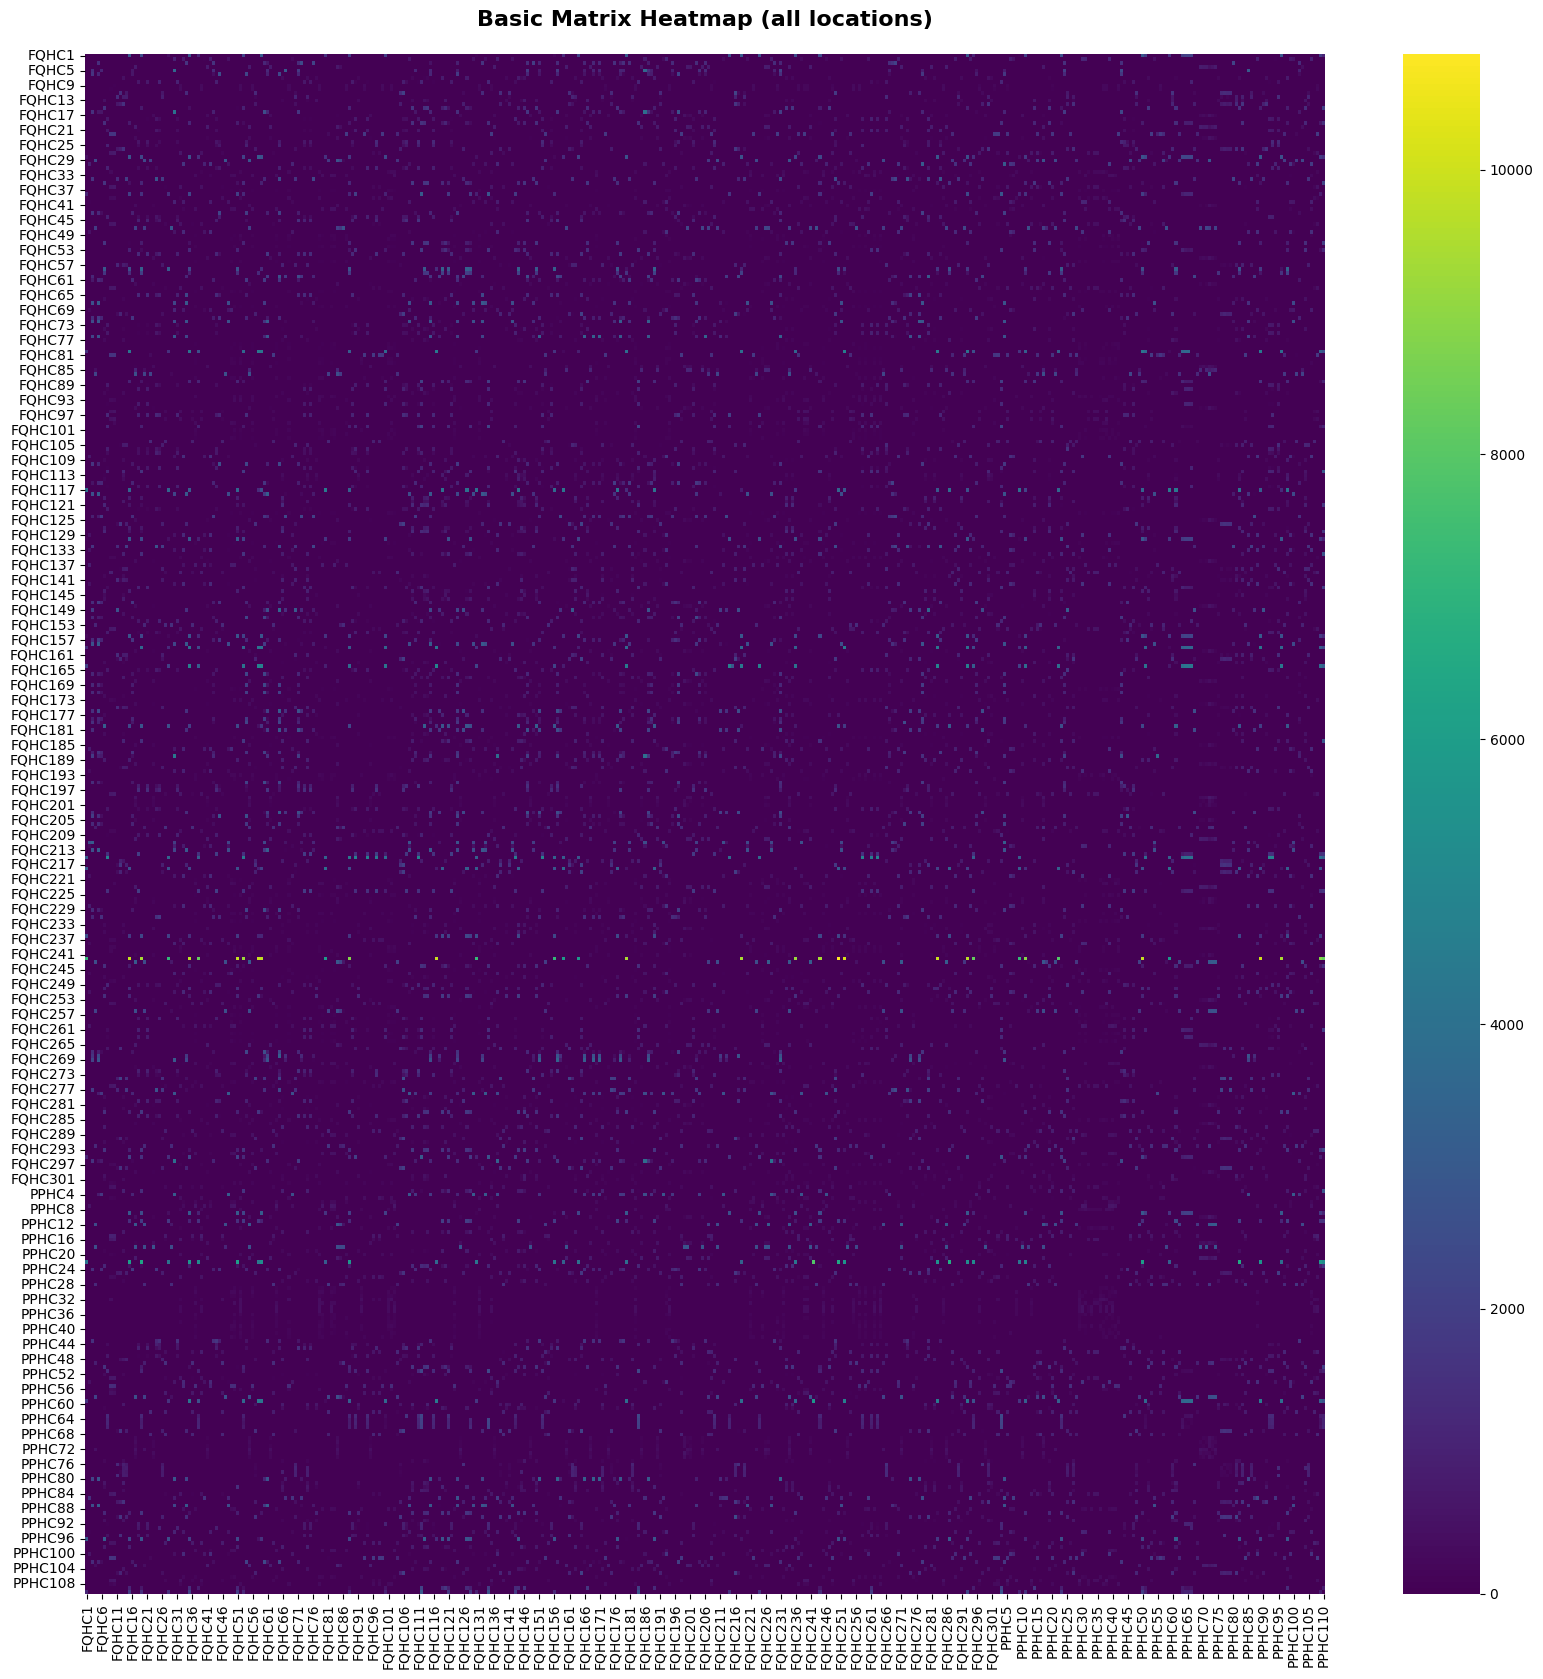

In [ ]:
# Basic Heatmap
plt.figure(figsize=(20, 20))

sns.heatmap(matrix_data, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap (all locations)", fontsize=16, fontweight='bold', pad=20)
plt.show()

#### Creating heatmap 100 x 100  

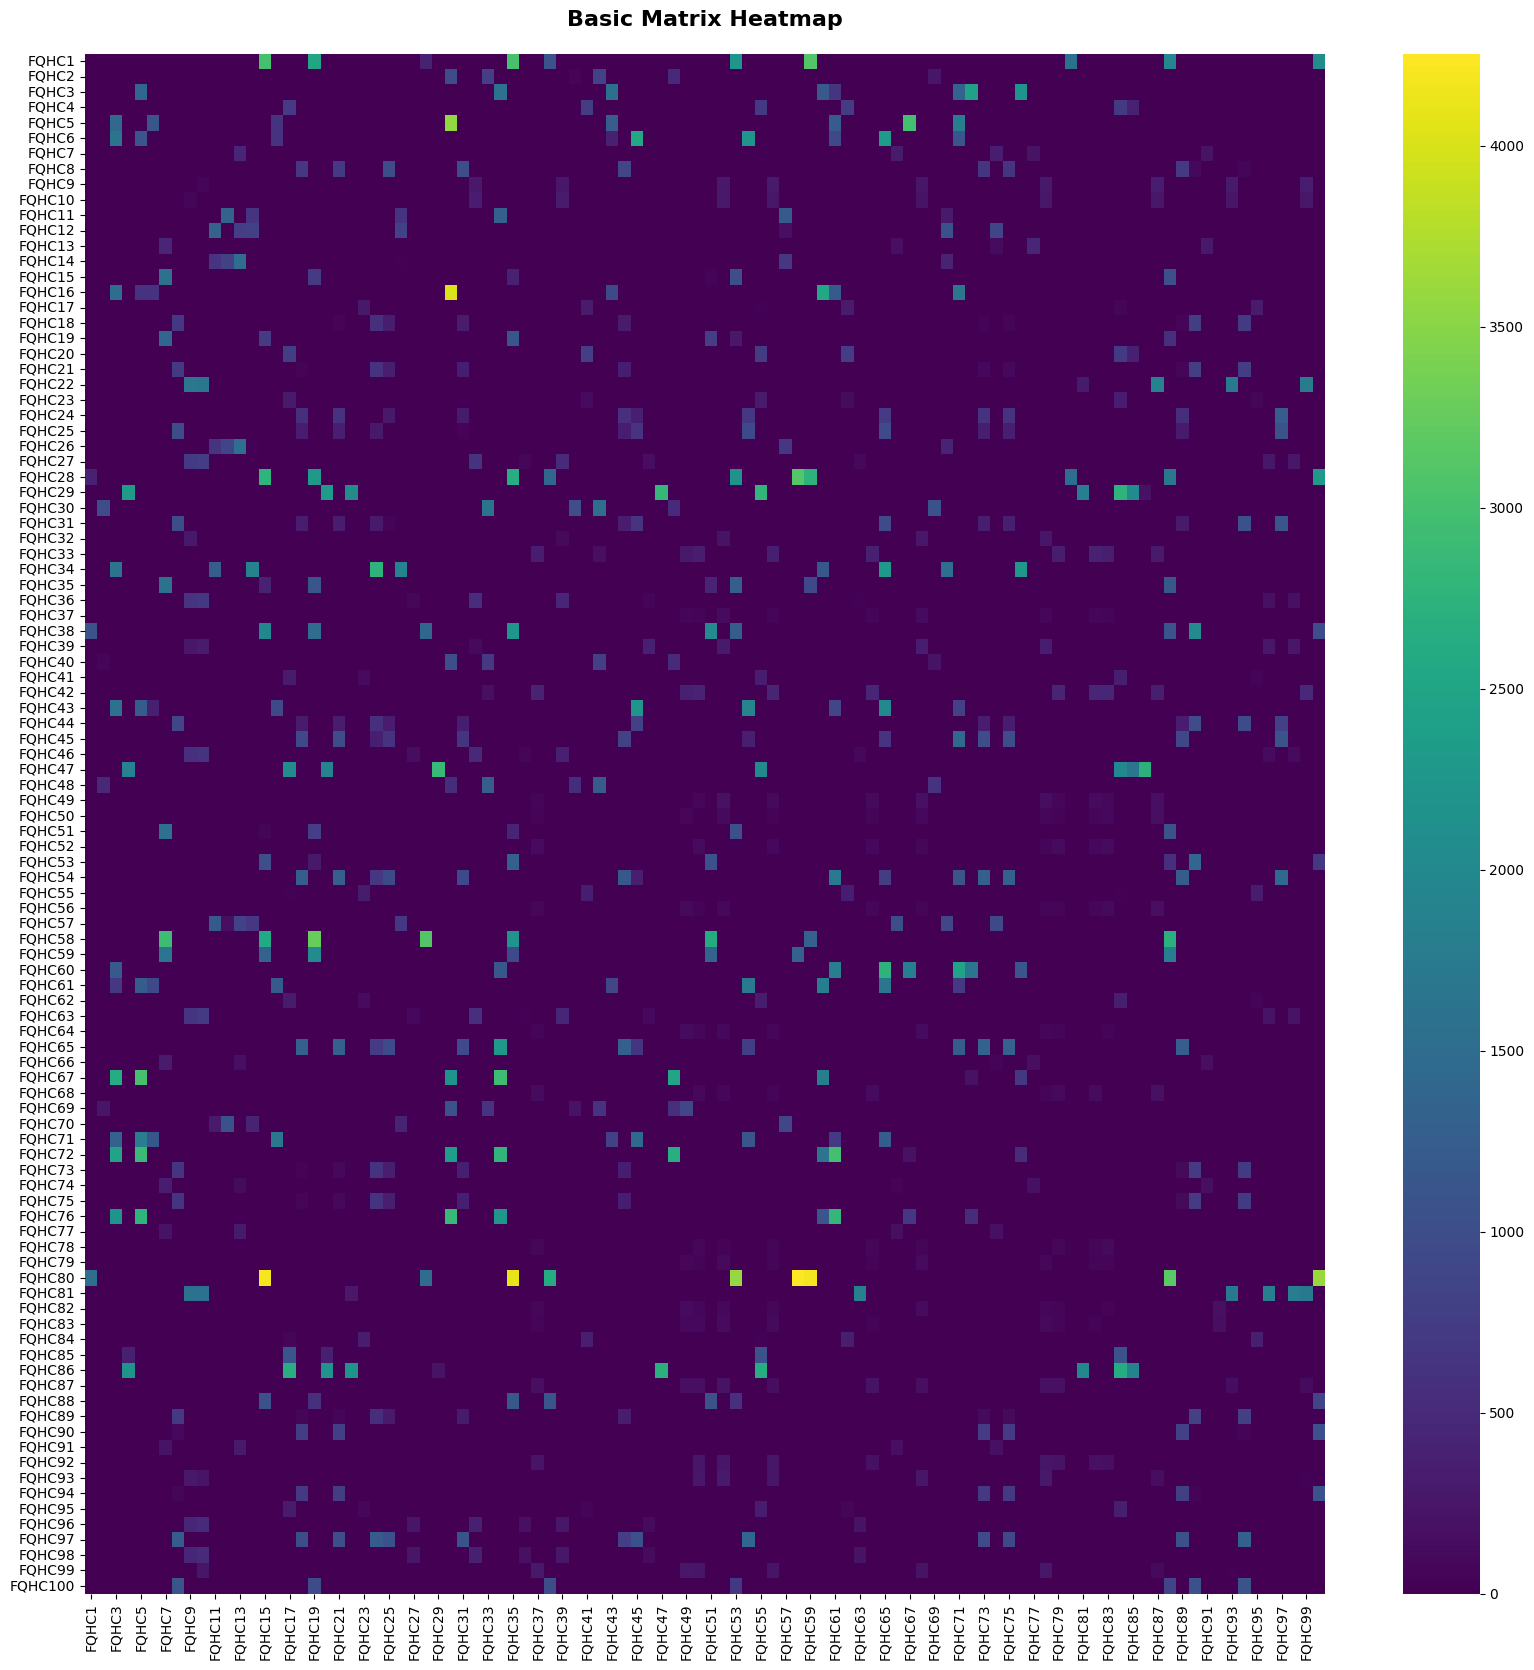

In [6]:
# creating subset of data of first 100 rows and columns
df_100 = matrix_data.iloc[:100, :100]
# 100 x 100 matrix
plt.figure(figsize=(20, 20))

sns.heatmap(df_100, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.show()

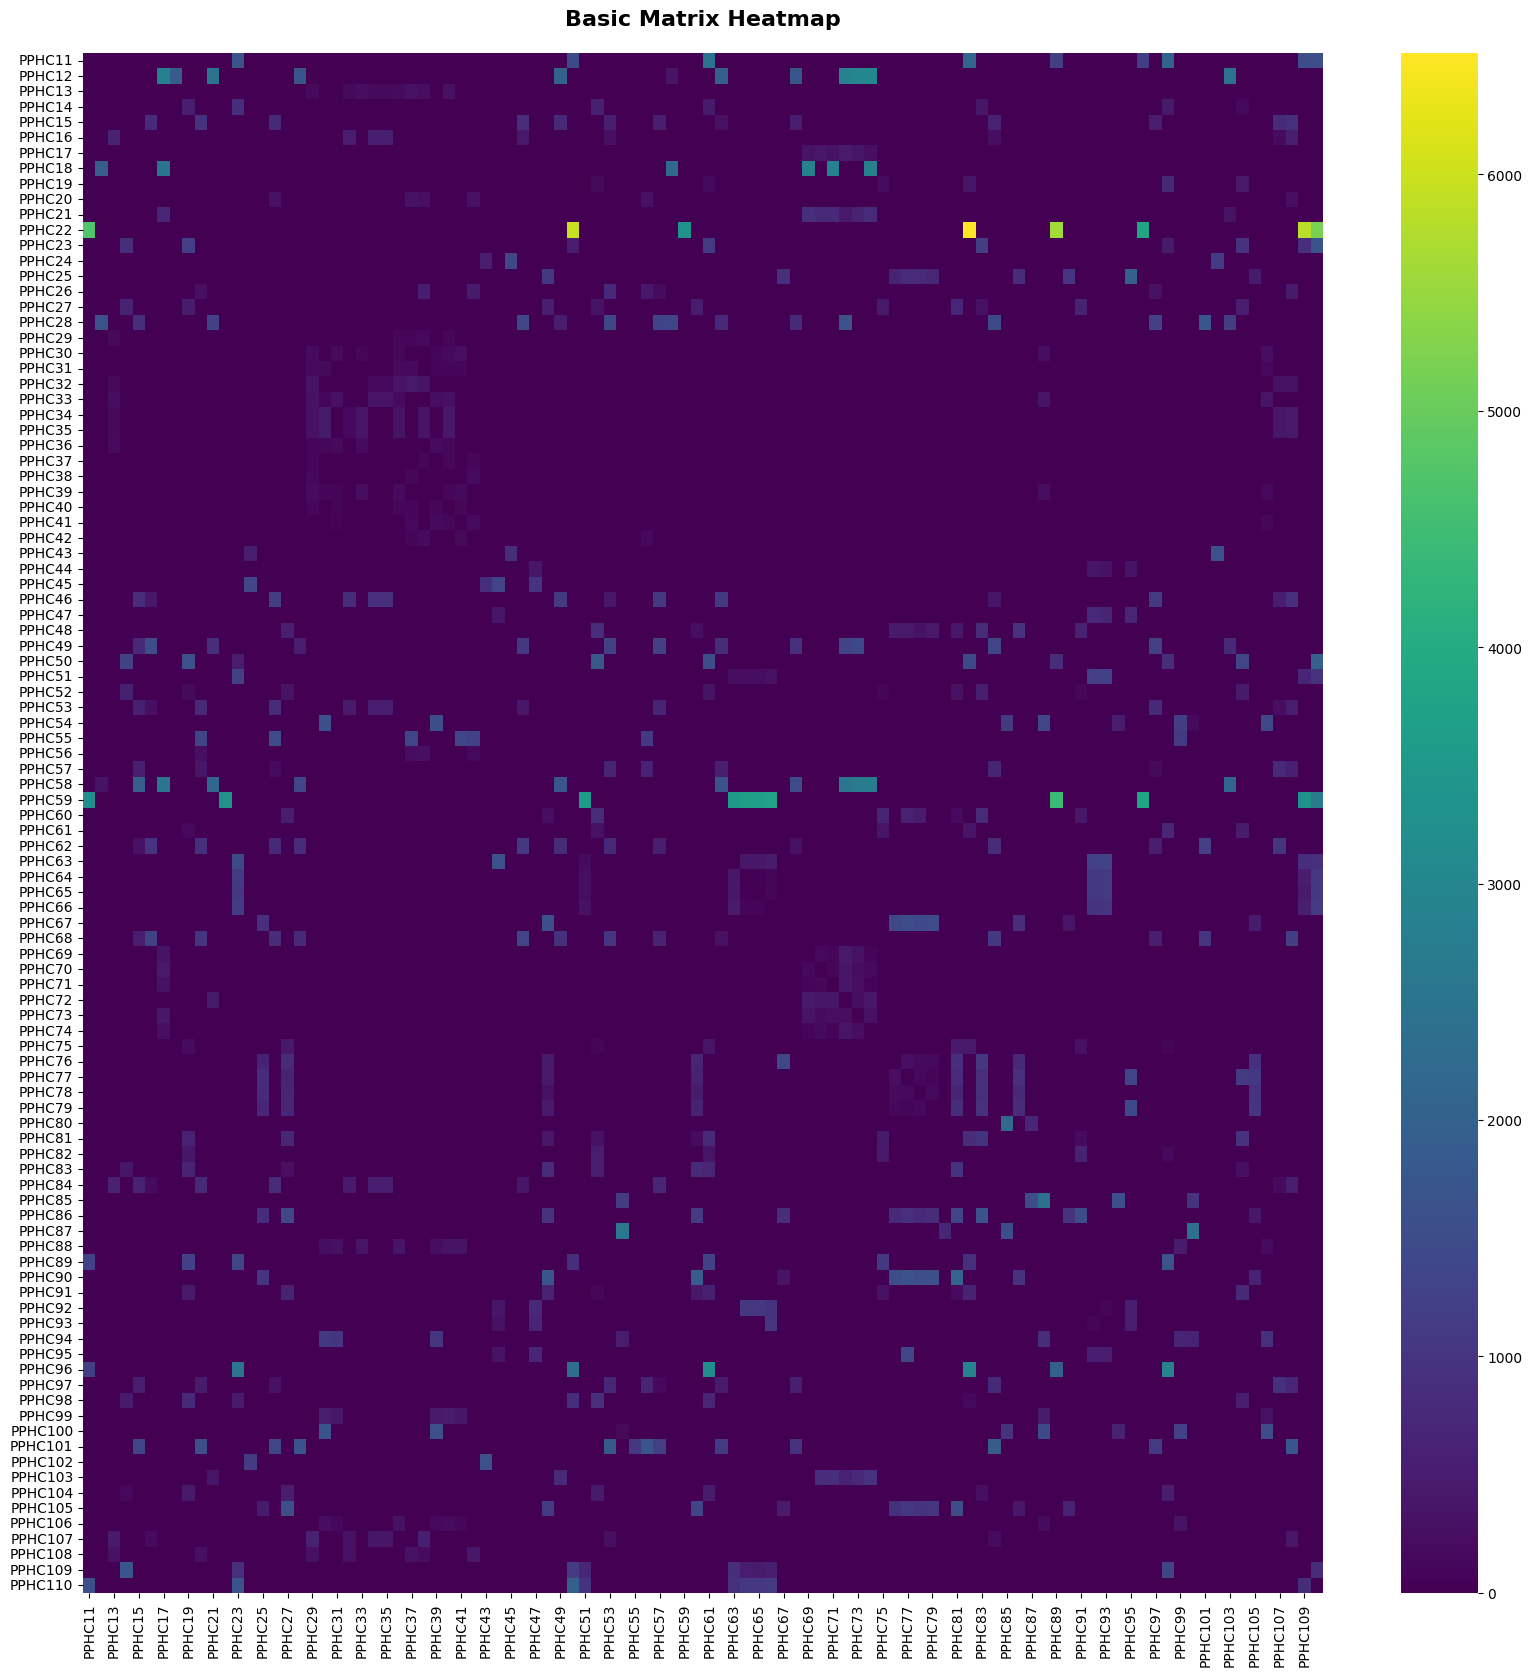

In [7]:
# heatmap of last 100 rows and columns
df_last_100 = matrix_data.iloc[-100:, -100:]
plt.figure(figsize=(20, 20))

sns.heatmap(df_last_100, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.show()

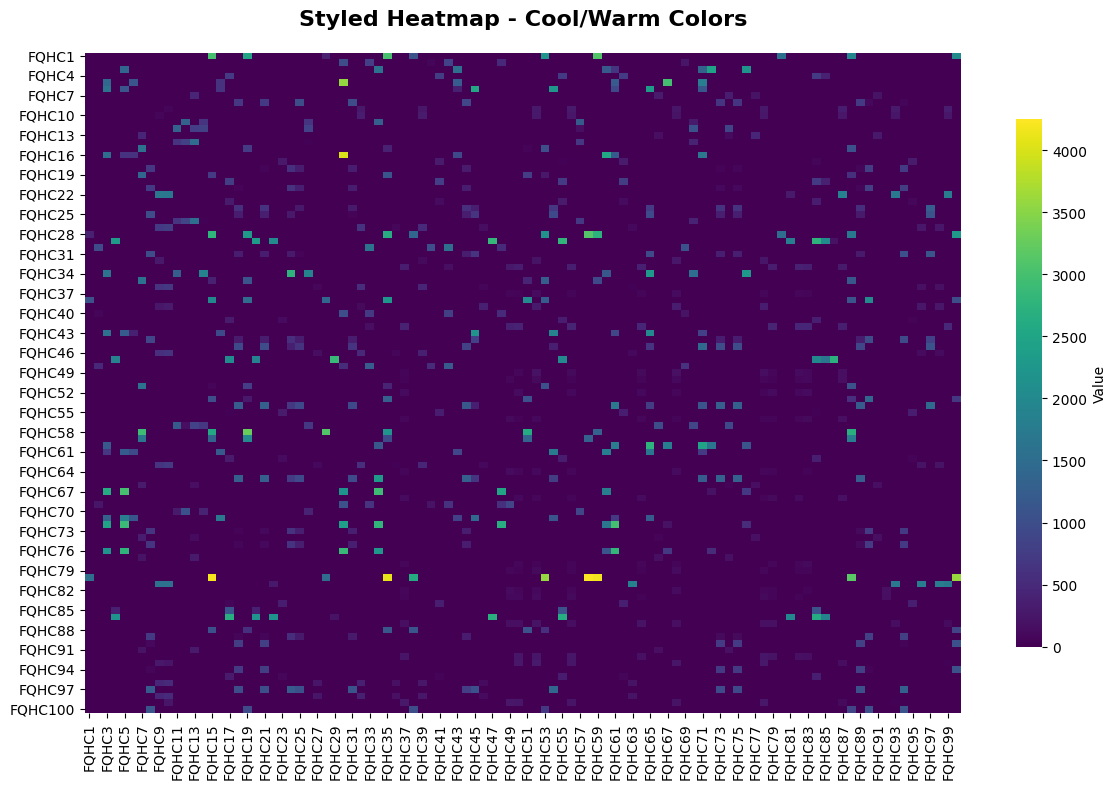

In [14]:
# Styled Heatmap with Color Map
plt.figure(figsize=(12, 8))

sns.heatmap(df_100,
            annot=False,
            cmap='viridis',  # Using a different colormap
            cbar_kws={'label': 'Value', 'shrink': 0.8})

plt.title("Styled Heatmap - Cool/Warm Colors", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

#### Creating correlation map

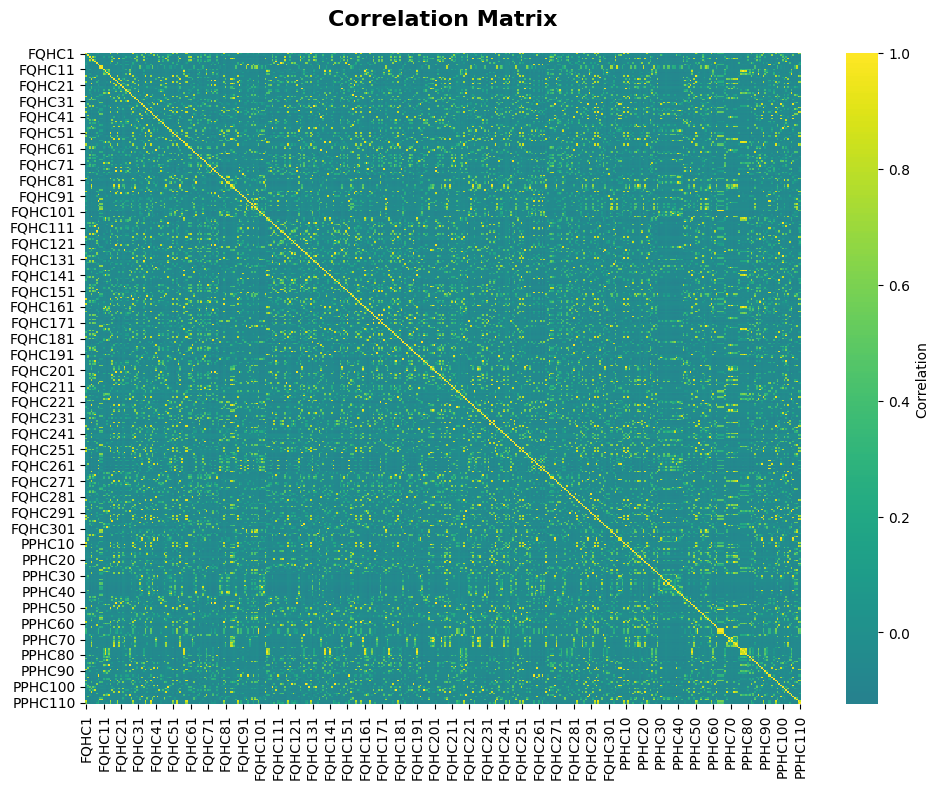

In [15]:
corr_data = matrix_data.corr()

# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_data,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

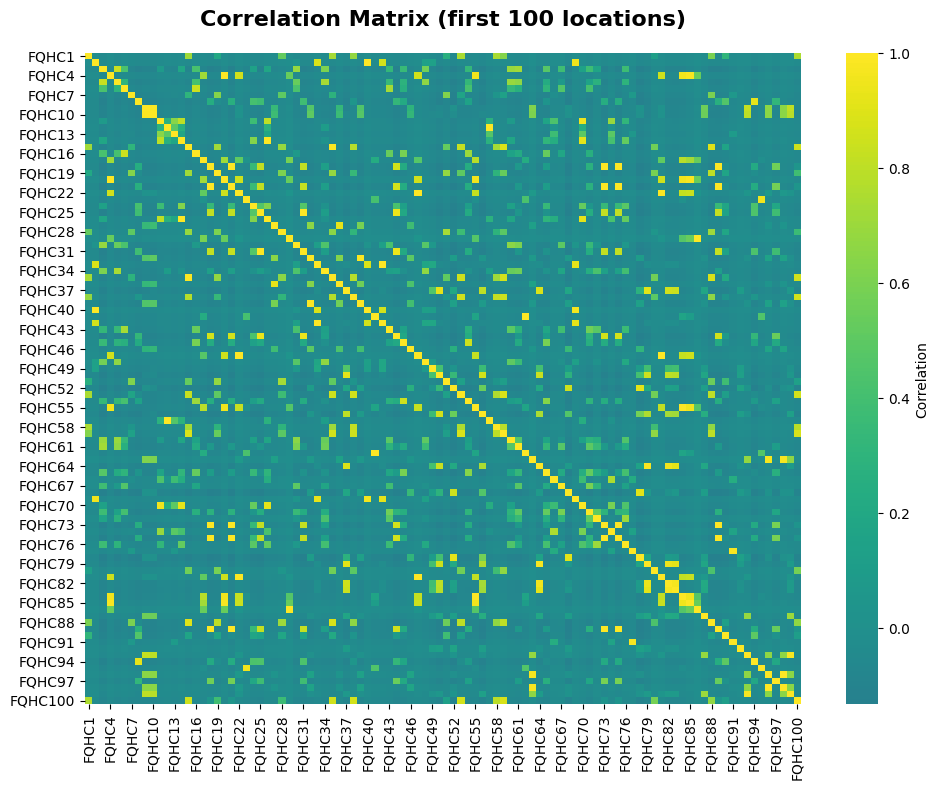

In [16]:
# correlation heatmap for 100 x 100 matrix
corr_data_100 = df_100.corr()
# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_data_100,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix (first 100 locations)", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

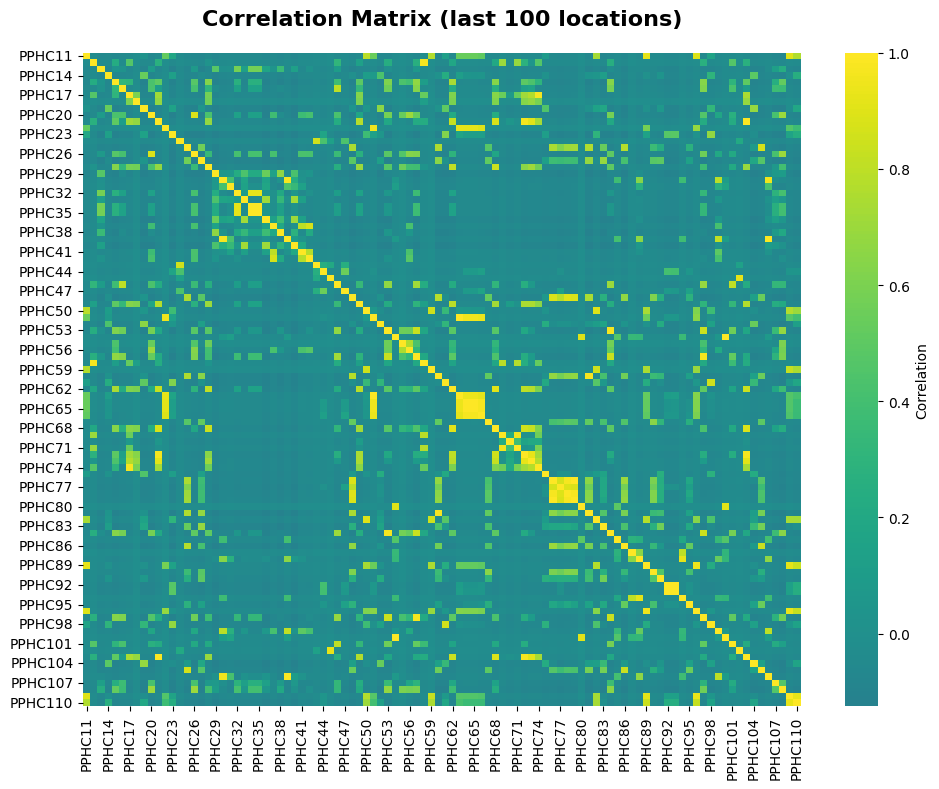

In [17]:
# correlation heatmap for last 100 x 100 matrix
corr_last_100 = df_last_100.corr()
# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_last_100,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix (last 100 locations)", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Walking Matrix for FQHCs

In [19]:
# xlxs file reading
fqhc_data = pd.read_excel('walking_matrix_fqhc.xlsx', 
                        #sheet_name='Matrix_Data',  # Sheet name
                        index_col=0,               # First column as index
                        header=0)                  # First row as headers

# Convert to numeric
fqhc_data = fqhc_data.apply(pd.to_numeric, errors='coerce')

print(f"Data shape: {fqhc_data.shape}")
print("First few rows:")
print(matrix_data.head())

Data shape: (301, 301)
First few rows:
       FQHC1  FQHC2        FQHC3  FQHC4    FQHC5        FQHC6  FQHC7  FQHC8  \
FQHC1    0.0    0.0     0.000000    0.0     0.00     0.000000    0.0    0.0   
FQHC2    0.0    0.0     0.000000    0.0     0.00     0.000000    0.0    0.0   
FQHC3    0.0    0.0     0.000000    0.0  1402.45     0.000000    0.0    0.0   
FQHC4    0.0    0.0     0.000000    0.0     0.00     0.000000    0.0    0.0   
FQHC5    0.0    0.0  1415.483333    0.0     0.00  1117.283333    0.0    0.0   

       FQHC9  FQHC10  ...  PPHC101  PPHC102  PPHC103  PPHC104  PPHC105  \
FQHC1    0.0     0.0  ...      0.0     0.00      0.0      0.0      0.0   
FQHC2    0.0     0.0  ...      0.0     0.00      0.0      0.0      0.0   
FQHC3    0.0     0.0  ...      0.0  1289.15      0.0      0.0      0.0   
FQHC4    0.0     0.0  ...      0.0     0.00    343.6      0.0      0.0   
FQHC5    0.0     0.0  ...      0.0   935.55      0.0      0.0      0.0   

       PPHC106  PPHC107  PPHC108  PPHC109

In [20]:
# cleaning data 
fqhc_data = fqhc_data.fillna(0)  # Fill NaN values with 0
print(fqhc_data.head())

       FQHC1  FQHC2        FQHC3  FQHC4    FQHC5        FQHC6  FQHC7  FQHC8  \
FQHC1    0.0    0.0     0.000000    0.0     0.00     0.000000    0.0    0.0   
FQHC2    0.0    0.0     0.000000    0.0     0.00     0.000000    0.0    0.0   
FQHC3    0.0    0.0     0.000000    0.0  1402.45  1601.633333    0.0    0.0   
FQHC4    0.0    0.0     0.000000    0.0     0.00     0.000000    0.0    0.0   
FQHC5    0.0    0.0  1415.483333    0.0     0.00  1117.283333    0.0    0.0   

       FQHC9  FQHC10  ...  FQHC292      FQHC293     FQHC294      FQHC295  \
FQHC1    0.0     0.0  ...      0.0  2956.866667    0.000000  1075.883333   
FQHC2    0.0     0.0  ...      0.0     0.000000  753.833333     0.000000   
FQHC3    0.0     0.0  ...      0.0     0.000000    0.000000     0.000000   
FQHC4    0.0     0.0  ...      0.0     0.000000    0.000000     0.000000   
FQHC5    0.0     0.0  ...      0.0     0.000000    0.000000     0.000000   

           FQHC296  FQHC297  FQHC298     FQHC299  FQHC300  FQHC301  

#### Creating heatmap and correlation map

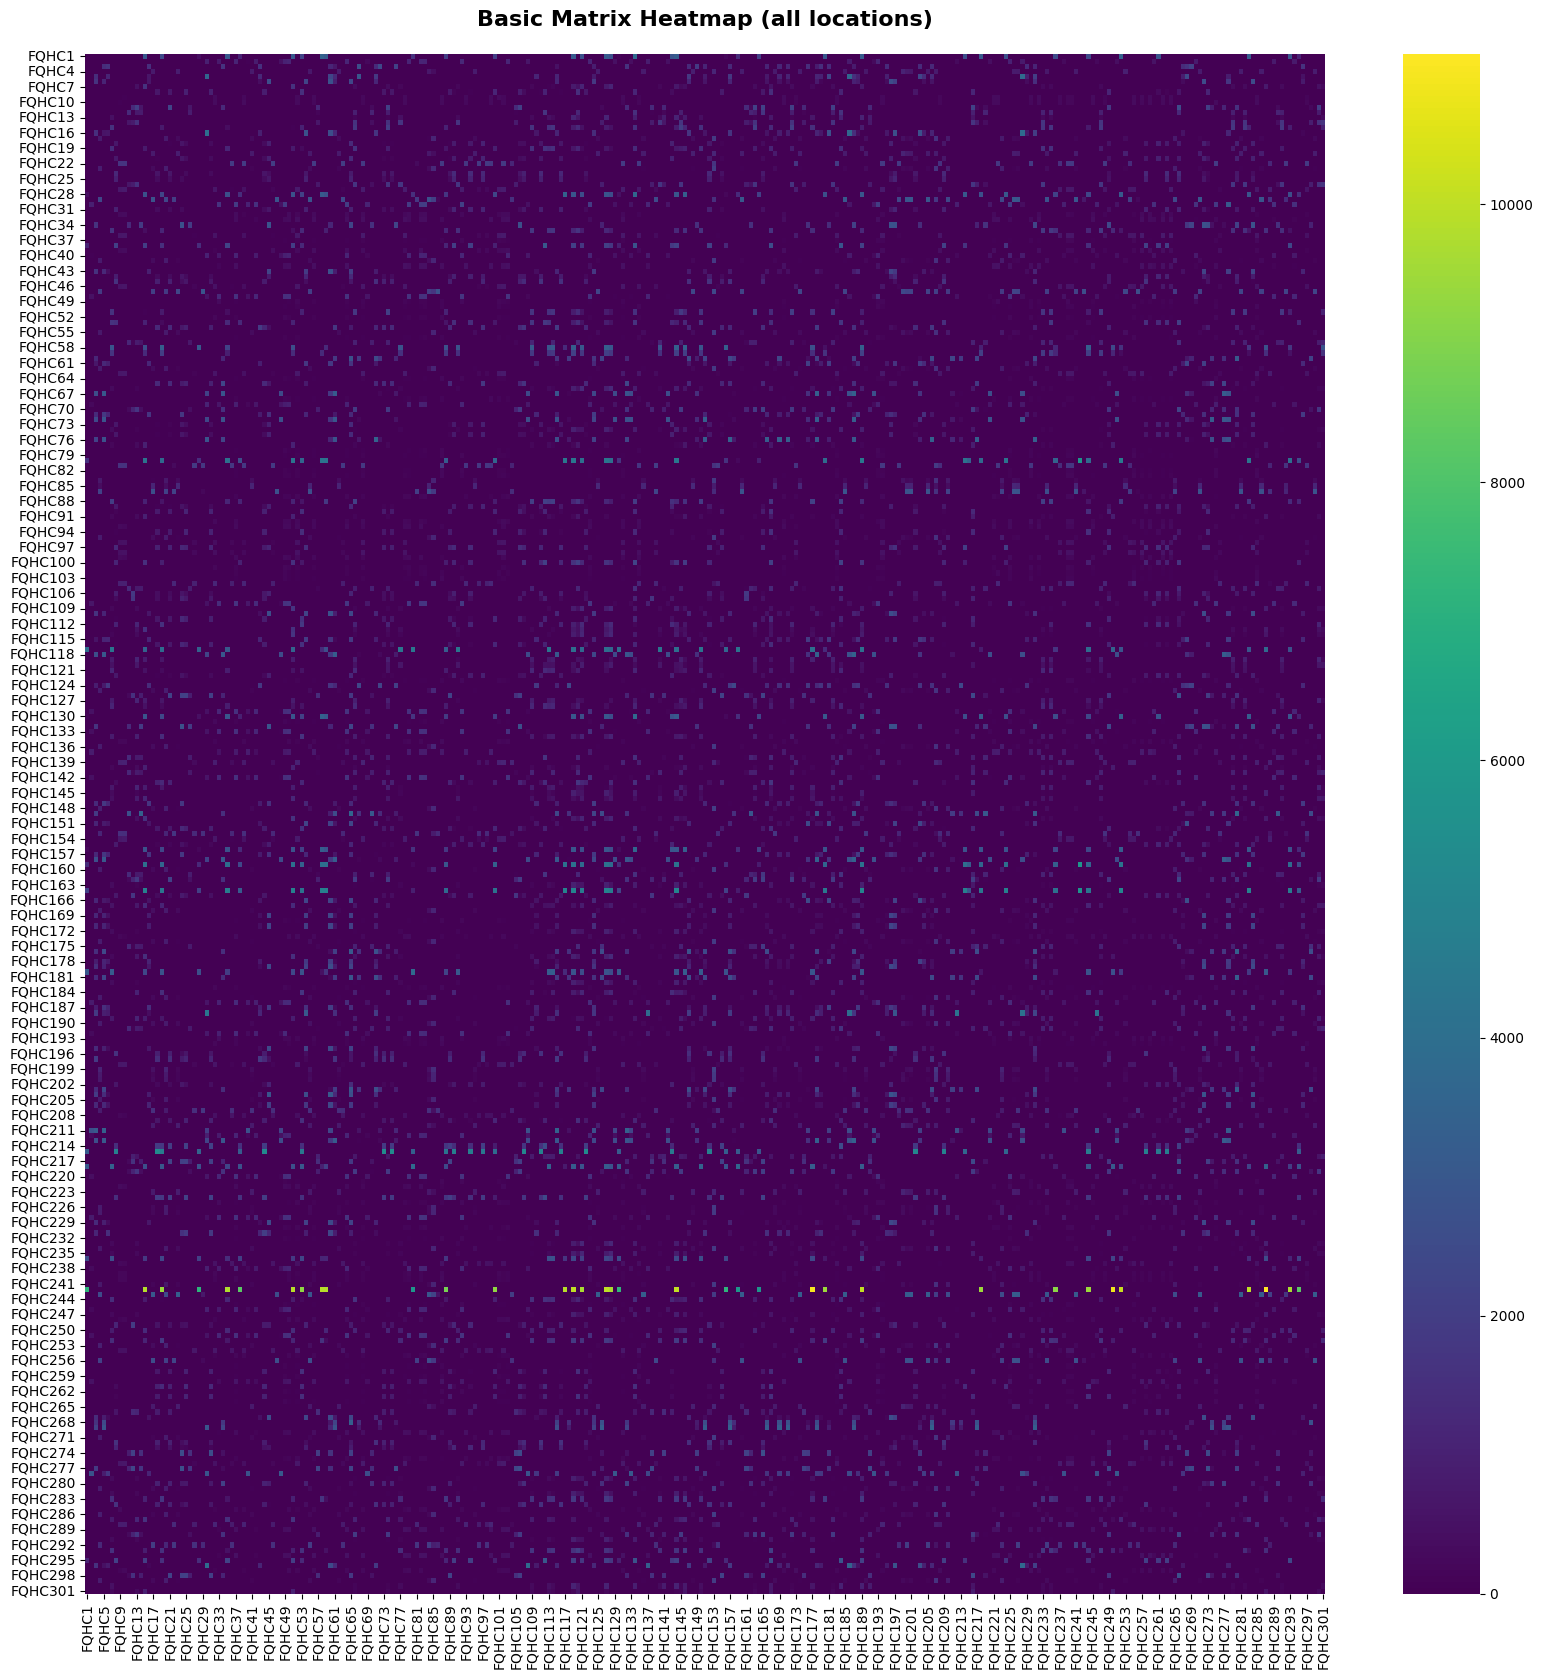

In [22]:
# Basic Heatmap
plt.figure(figsize=(20, 20))

sns.heatmap(fqhc_data, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap (all locations)", fontsize=16, fontweight='bold', pad=20)
plt.show()

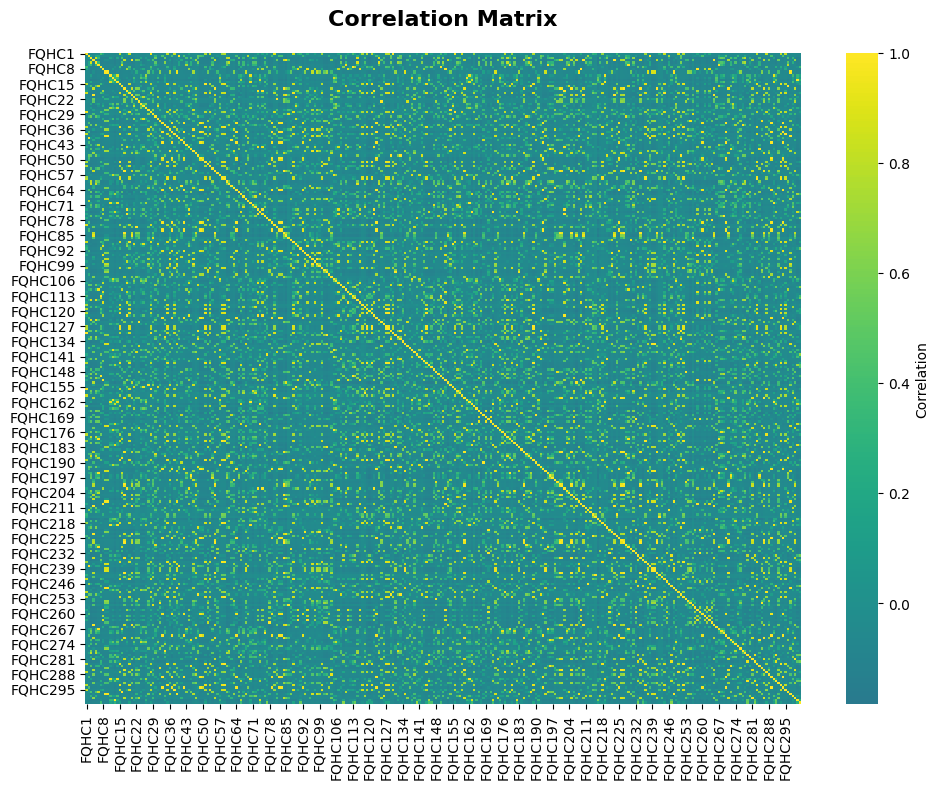

In [23]:
corr_fqhc = fqhc_data.corr()

# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_fqhc,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

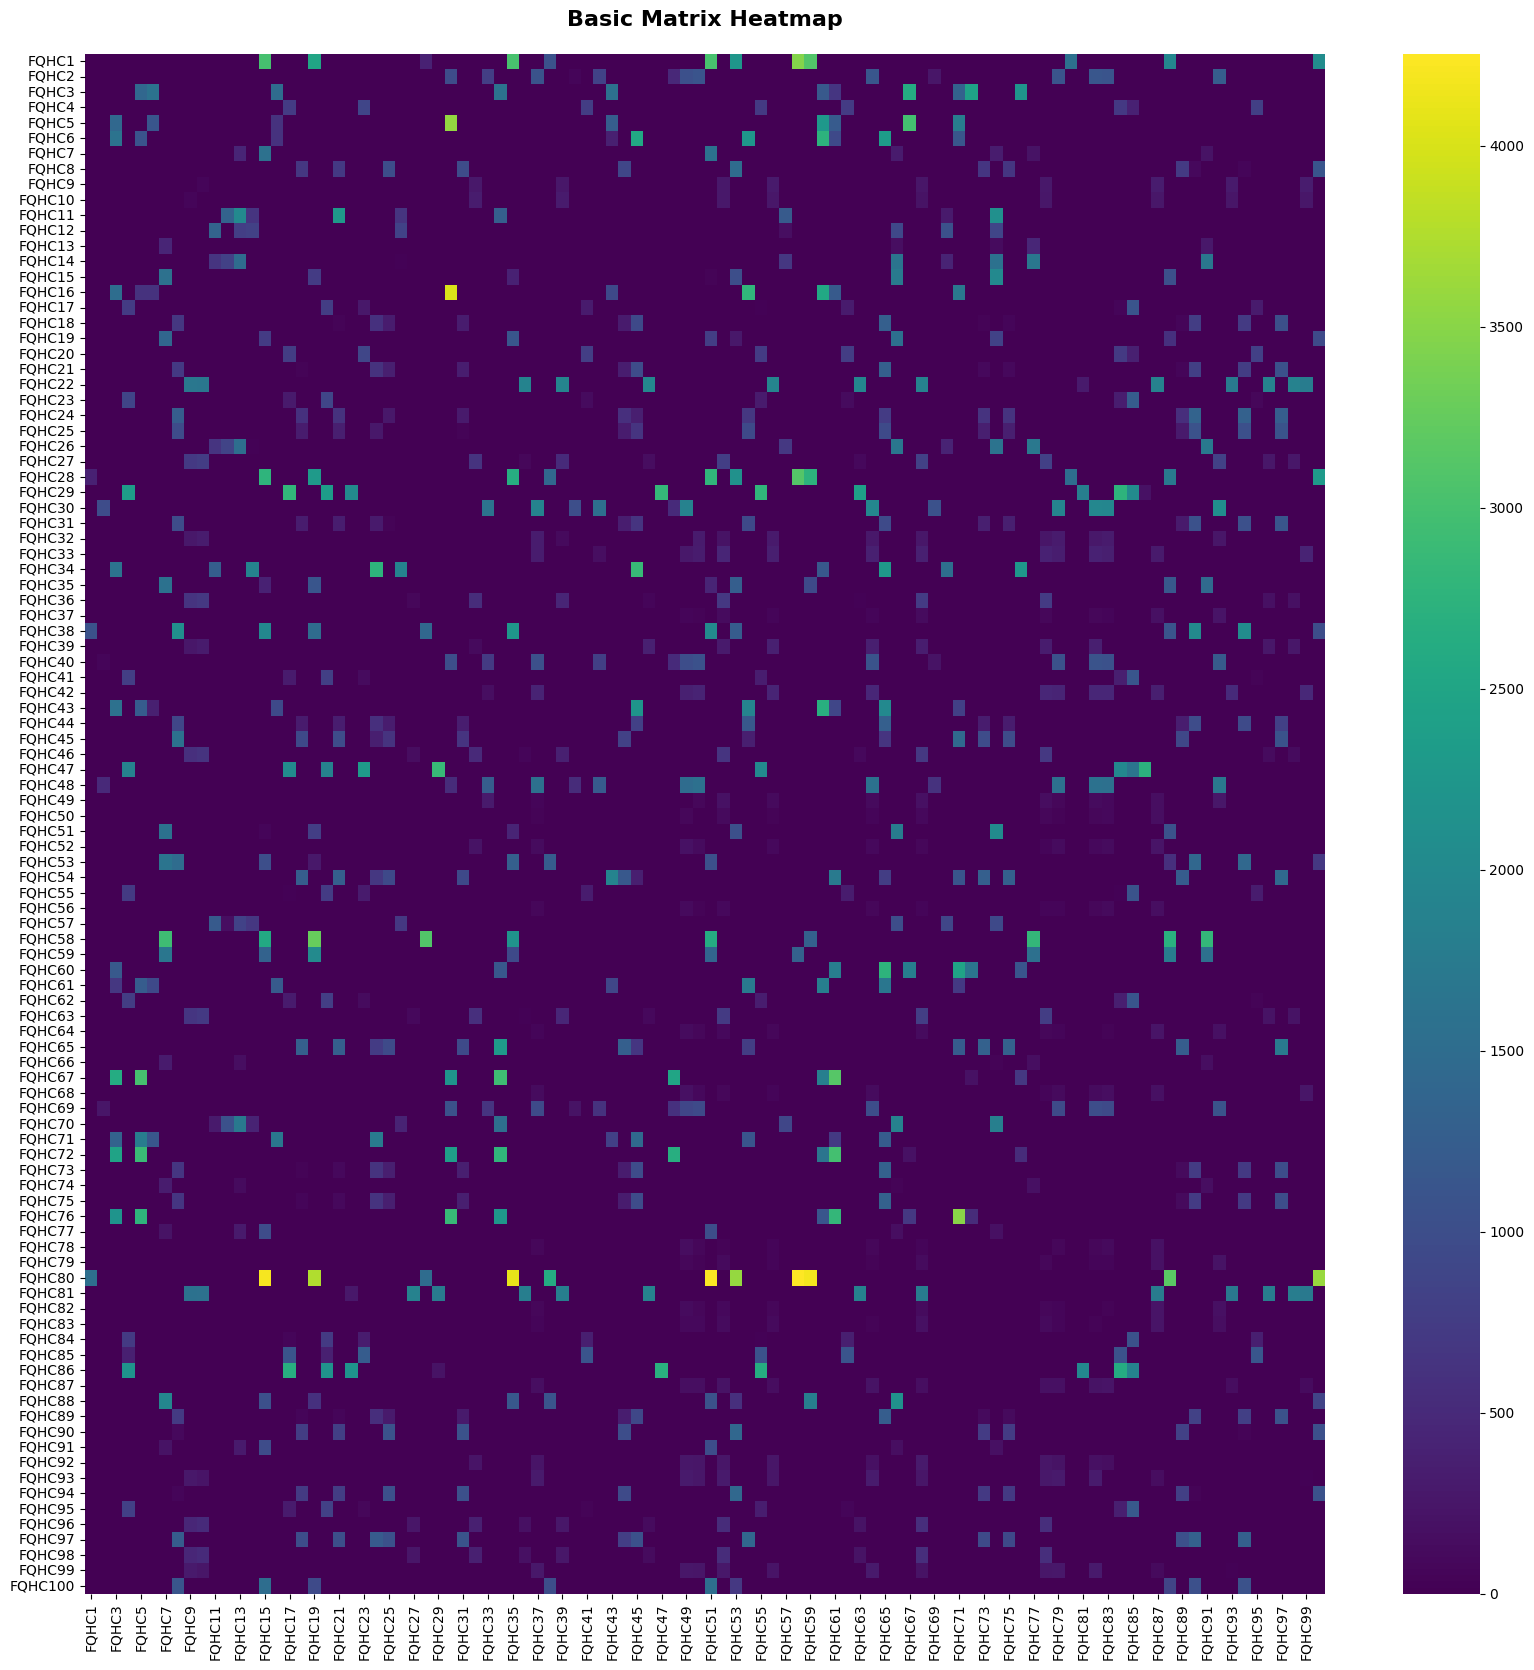

In [26]:
# creating subset of data of first 100 rows and columns
fqhc_100 = fqhc_data.iloc[:100, :100]
# 100 x 100 matrix
plt.figure(figsize=(20, 20))

sns.heatmap(fqhc_100, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.show()

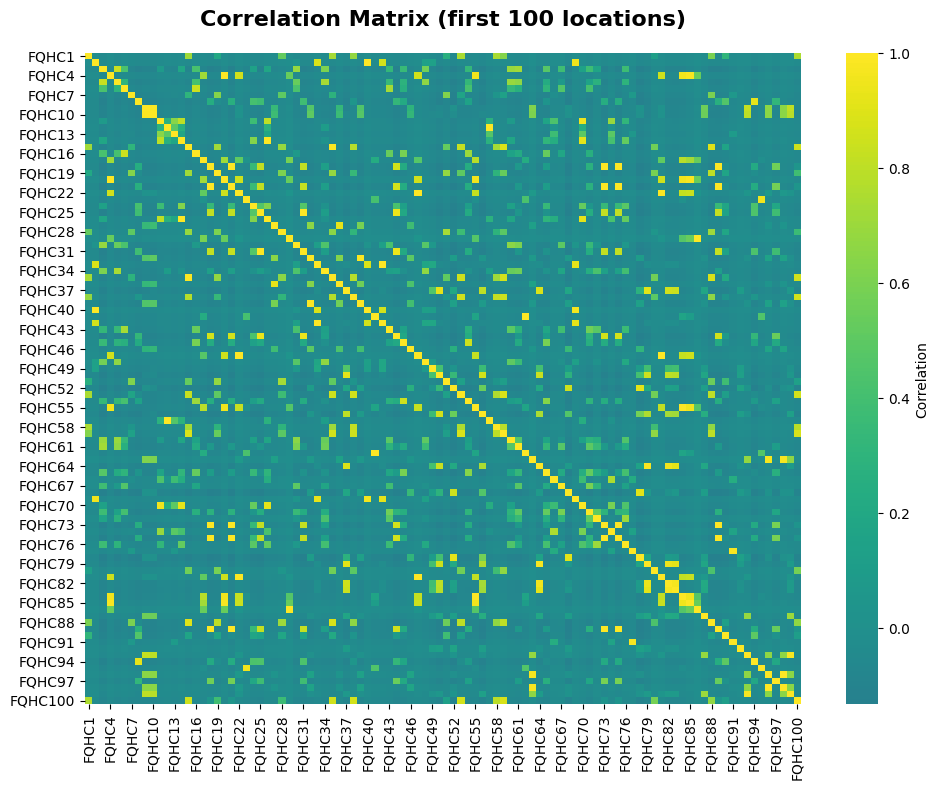

In [27]:
# correlation heatmap for 100 x 100 matrix
corr_fqhc_100 = fqhc_100.corr()
# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_data_100,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix (first 100 locations)", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


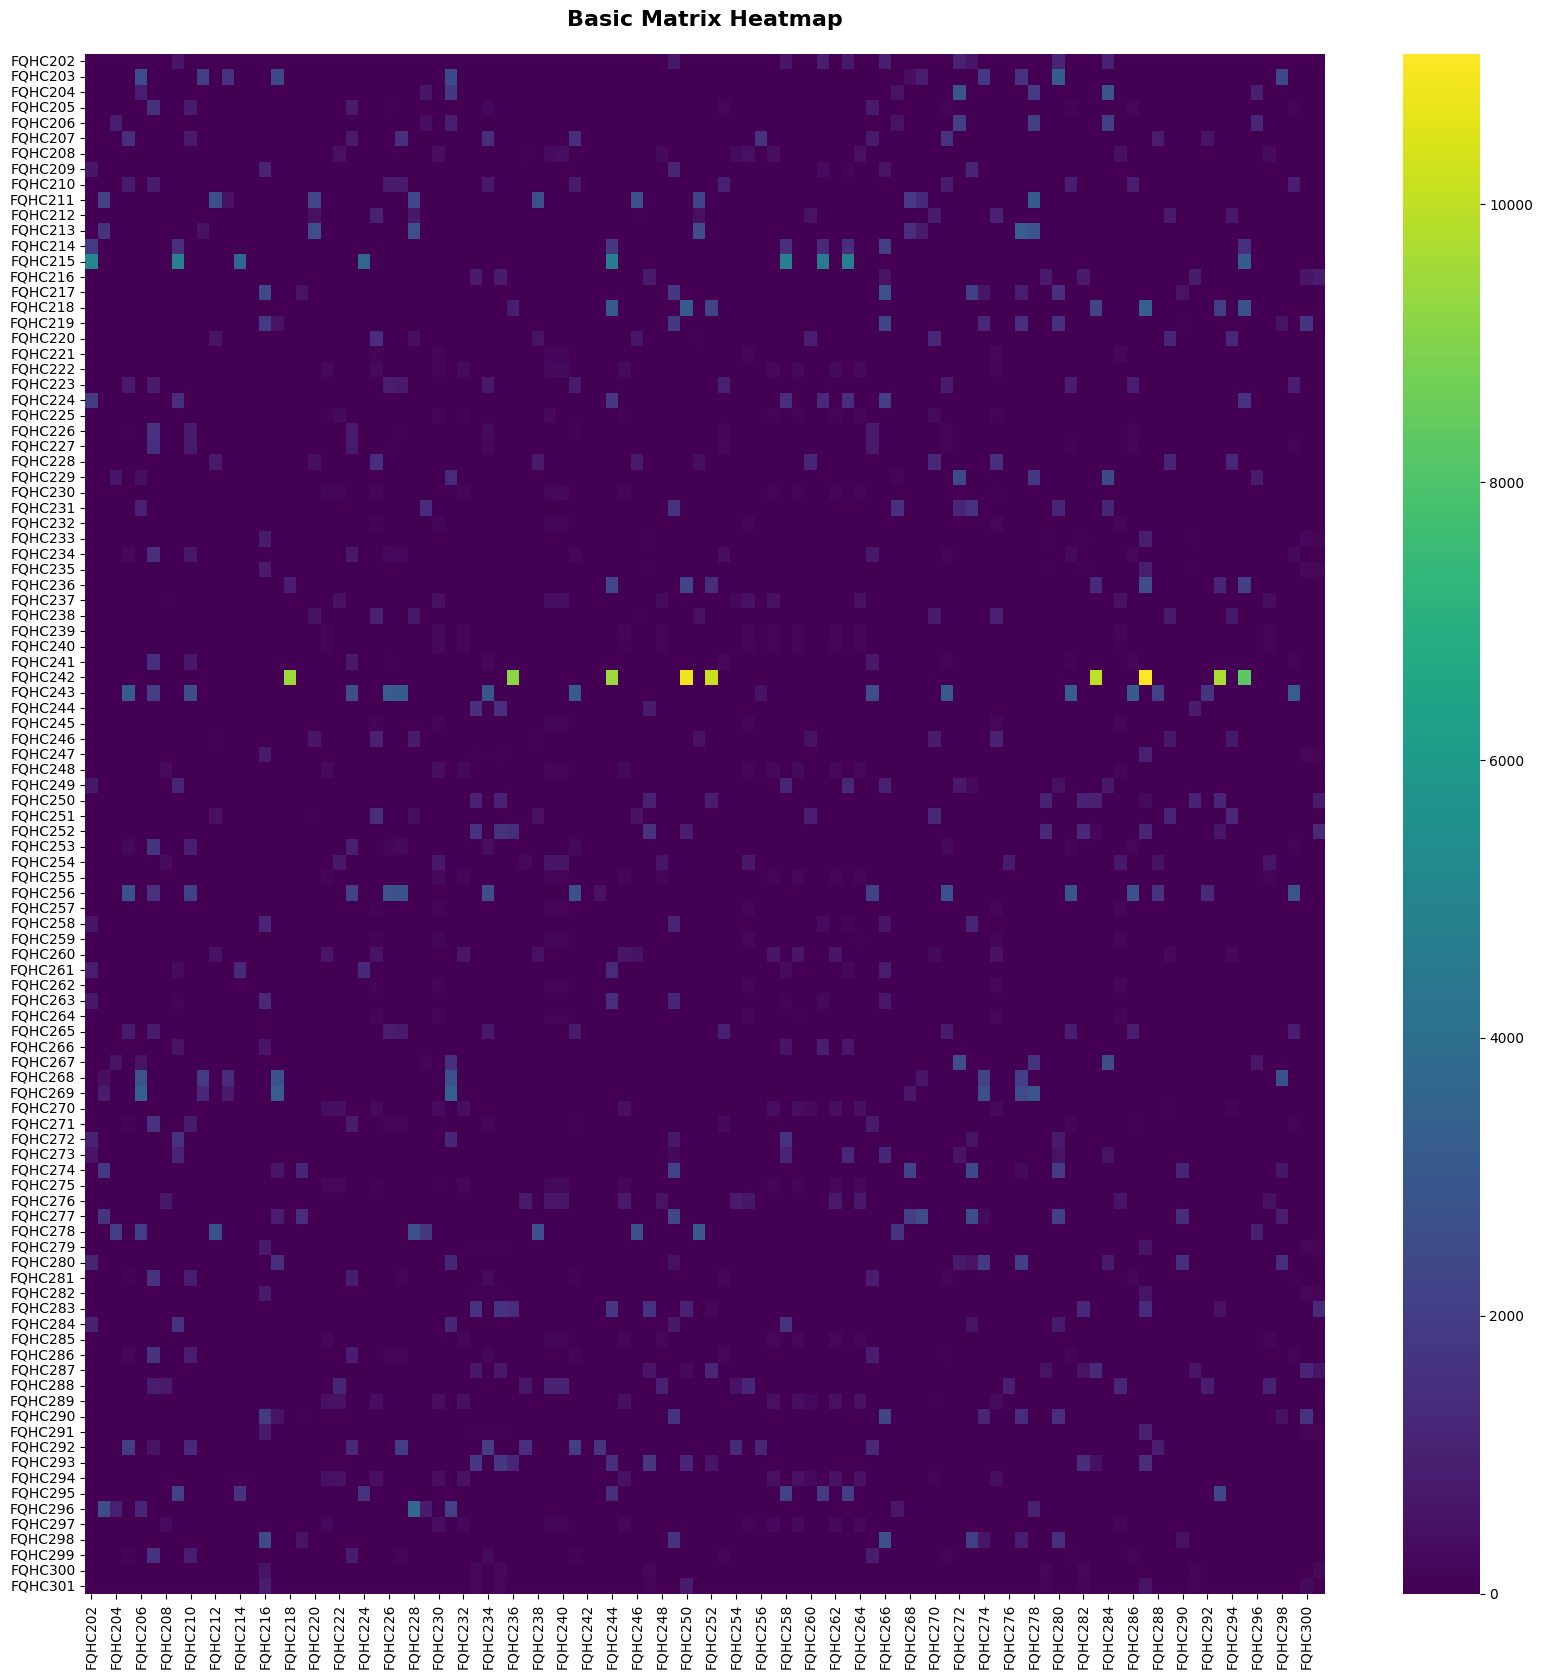

In [28]:
# for the last 100 
fqhc_last_100 = fqhc_data.iloc[-100:, -100:]
# 100 x 100 matrix
plt.figure(figsize=(20, 20))

sns.heatmap(fqhc_last_100, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.show()

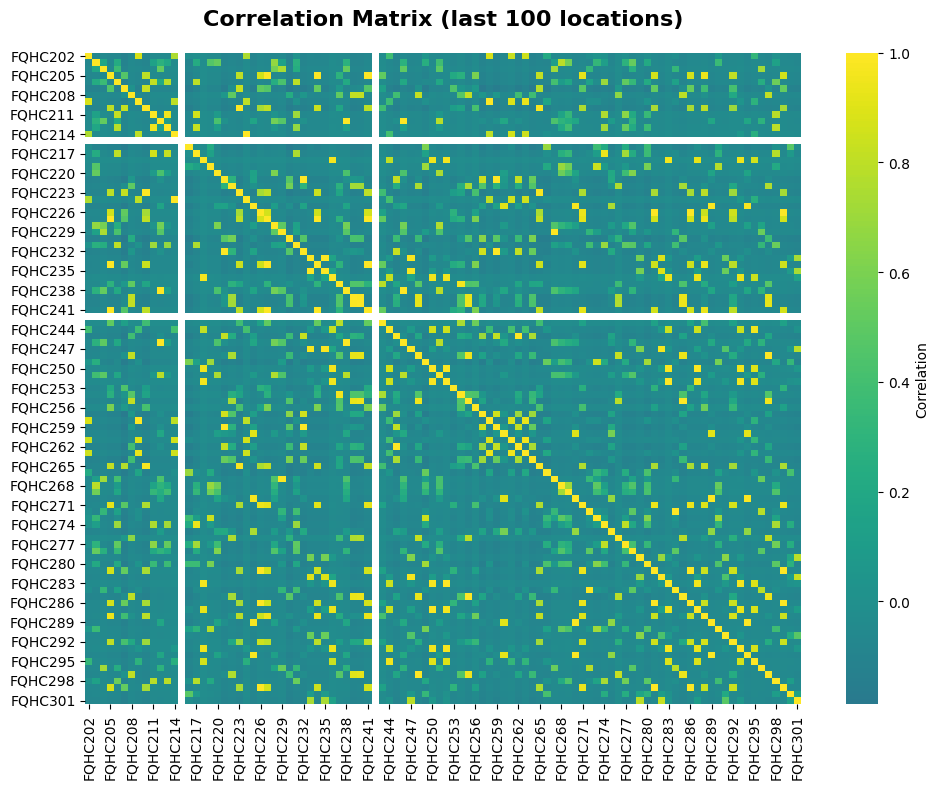

In [30]:
# correlation heatmap for 100 x 100 matrix
corr_fqhc_l100 = fqhc_last_100.corr()
# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_fqhc_l100,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix (last 100 locations)", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()